In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
# NLP (Natural Language Processing) works by converting words (texts) into numbers 
# These numbers are then used to train the Machine Learning Models to make Predictions
# This AI/ML model is crucial for companies to detect their customer reviews fast and efficiently
# The dataset contains 1000's of tweets and detects tweet as positive (1) or negative (0)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk


In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/job/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
data=pd.read_csv('/home/job/Downloads/tweets.csv')

In [7]:


data.info()
data



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
...,...,...,...
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7916,7917,0,We would like to wish you an amazing day! Make...
7917,7918,0,Helping my lovely 90 year old neighbor with he...
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...


In [8]:


data.describe()



,id,label
count,7920.000000,7920.000000
mean,3960.500000,0.255808
std,2286.451399,0.436342
min,1.000000,0.000000
25%,1980.750000,0.000000
50%,3960.500000,0.000000
75%,5940.250000,1.000000
max,7920.000000,1.000000


In [9]:


data['tweet']



0       #fingerprint #Pregnancy Test https://goo.gl/h1...
1       Finally a transparant silicon case ^^ Thanks t...
2       We love this! Would you go? #talk #makememorie...
3       I'm wired I know I'm George I was made that wa...
4       What amazing service! Apple won't even talk to...
                              ...                        
7915    Live out loud #lol #liveoutloud #selfie #smile...
7916    We would like to wish you an amazing day! Make...
7917    Helping my lovely 90 year old neighbor with he...
7918    Finally got my #smart #pocket #wifi stay conne...
7919    Apple Barcelona!!! #Apple #Store #BCN #Barcelo...
Name: tweet, Length: 7920, dtype: object

In [10]:
tweets_df=data

In [11]:
tweets_df = tweets_df.drop(['id'], axis=1)

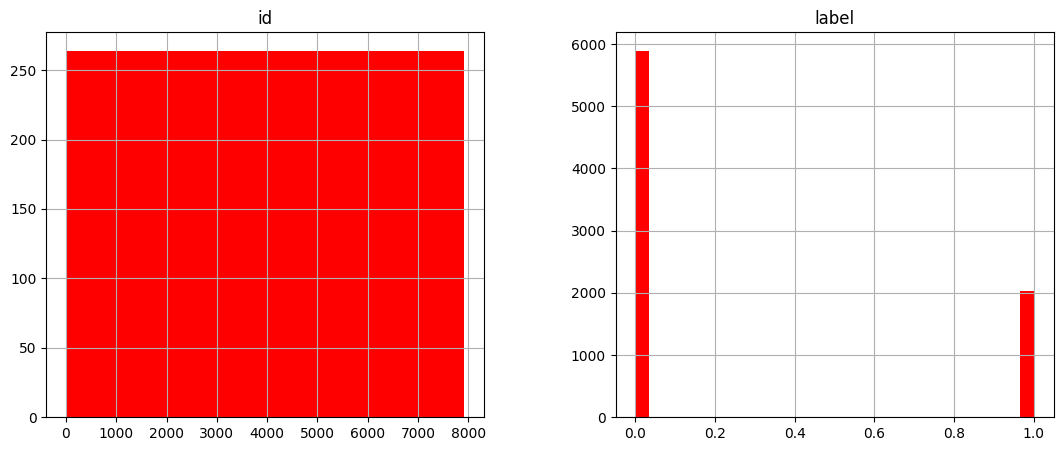

In [12]:
##exxploringg data
data.hist(bins = 30, figsize = (13,5), color = 'r')
plt.show()


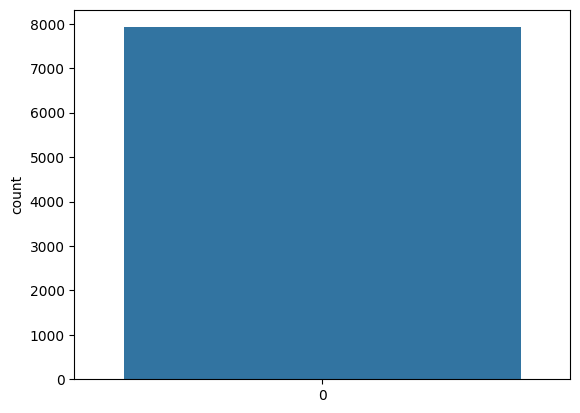

In [13]:
sns.countplot(tweets_df['label'], label = "Count") 
plt.show()


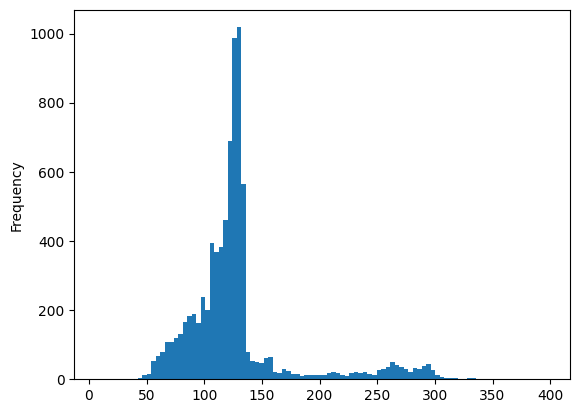

In [14]:
tweets_df['length']=tweets_df['tweet'].apply(len)

tweets_df['length'].plot(bins=100, kind='hist') 
plt.show()

In [15]:
tweets_df.describe()

,label,length
count,7920.000000,7920.000000
mean,0.255808,128.920707
std,0.436342,48.735818
min,0.000000,7.000000
25%,0.000000,106.000000
50%,0.000000,124.000000
75%,1.000000,131.000000
max,1.000000,398.000000


In [16]:
# shortest message 
tweets_df[tweets_df['length'] ==7]['tweet'].iloc[0]


'#ERROR!'

In [17]:
# message with mean length 
tweets_df[tweets_df['length'] == 128]['tweet'].iloc[0]

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [18]:
positive = tweets_df[tweets_df['label']==0]
positive

,label,tweet,length
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,128
1,0,Finally a transparant silicon case ^^ Thanks t...,131
2,0,We love this! Would you go? #talk #makememorie...,123
3,0,I'm wired I know I'm George I was made that wa...,112
6,0,Happy for us .. #instapic #instadaily #us #son...,100
...,...,...,...
7915,0,Live out loud #lol #liveoutloud #selfie #smile...,107
7916,0,We would like to wish you an amazing day! Make...,134
7917,0,Helping my lovely 90 year old neighbor with he...,129
7918,0,Finally got my #smart #pocket #wifi stay conne...,133


In [19]:
negative = tweets_df[tweets_df['label']==1]
negative


,label,tweet,length
4,1,What amazing service! Apple won't even talk to...,124
5,1,iPhone software update fucked up my phone big ...,65
10,1,hey #apple when you make a new ipod dont make ...,124
11,1,Ha! Not heavy machinery but it does what I nee...,122
12,1,Contemplating giving in to the iPhone bandwago...,116
...,...,...,...
7901,1,@brendan_brady1: The new apple advert can fuck...,95
7902,1,All I wanna do is put music from my iTunes on ...,113
7904,1,#FuckYou #Apple one thing stops working and I ...,89
7908,1,SECOND FUCKING TIME. Stay on hold for 30 mins ...,128


In [20]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
Test = 'COGITO ERO SUM'
Test_punc_removed = []
for char in Test: 
    if char not in string.punctuation:
        Test_punc_removed.append(char)
        

Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'COGITO ERO SUM'

In [22]:
## Cleaning

In [23]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
##Tokenization
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']

vectorizer= CountVectorizer()
X=vectorizer.fit_transform(sample_data)

In [25]:
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'paper' 'second' 'the' 'third' 'this']


In [26]:
print(X.toarray())

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


In [27]:
challenge = ['Hello World','Hello Hello World','Hello World world world']

vectorizer_challenge = CountVectorizer()
X_challenge = vectorizer_challenge.fit_transform(challenge)
print(X_challenge.toarray())

[[1 1]
 [2 1]
 [1 3]]


In [28]:
##Remove Punctuations, Stop words & Perform Tokenization
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [29]:
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

print(tweets_df_clean[5])

['iPhone', 'software', 'update', 'fucked', 'phone', 'big', 'time', 'Stupid', 'iPhones']


In [30]:
print(tweets_df['tweet'][5])

iPhone software update fucked up my phone big time Stupid iPhones


In [31]:
from sklearn.feature_extraction.text import CountVectorizer

# Define the cleaning pipeline 
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])

In [32]:


vectorizer.get_feature_names_out()



array(['0', '000', '00000', ..., '\U000fe968THIS', '\U000feb14',
       '\U000feb16'], dtype=object)

In [33]:
print(tweets_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [34]:
tweets_countvectorizer.shape

(7920, 26765)

In [35]:
tweets = pd.DataFrame(tweets_countvectorizer.toarray())

X = tweets

X

,0,1,2,3,4,5,6,7,8,9,...,26755,26756,26757,26758,26759,26760,26761,26762,26763,26764
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:


y = tweets_df['label']



In [37]:
##Naive Bayes
print(X.shape)

print(y.shape)

(7920, 26765)
(7920,)


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)